In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from skimage.transform import resize

In [2]:
no_of_clusters = 5
beta = 5
eps = 1e-6

In [3]:
face = face(gray=True)
face = resize(face, (face.shape[0] /8, face.shape[1] /8))

C:\Users\Deepak\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
graph = image.img_to_graph(face)
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

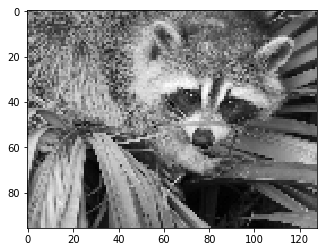

In [5]:
plt.gray()
plt.imshow(face)
plt.show()

Spectral clustering: kmeans, 19.62s
Spectral clustering: discretize, 19.50s


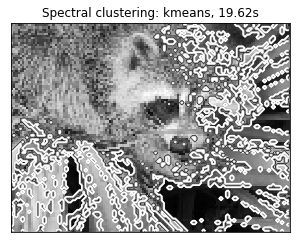

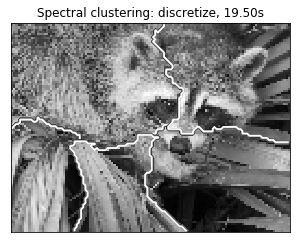

In [6]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=no_of_clusters,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(no_of_clusters):
        plt.contour(labels == l)
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()